# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [26]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [28]:
new_df = df[df['dt'] >= '1950-01-01']
new_df['Year'] = df['dt'].dt.year
new_df.head()

/var/folders/md/1x4hwqds2gv4pztv494qc23r0000gn/T/ipykernel_3654/2468012430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = df['dt'].dt.year


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

In [31]:
toronto_df = new_df[['AverageTemperature', 'City', 'Year']][new_df['City'] == 'Toronto'] \
    .groupby(['City', 'Year']).mean()
toronto_df.head()

AverageTemperature
City    Year                    
Toronto 1950            5.639583
        1951            6.259083
        1952            7.013417
        1953            7.506250
        1954            6.243083

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [32]:
var_df = new_df[['AverageTemperature', 'City']].groupby(['City']).var()
max_var = var_df[var_df['AverageTemperature'] == var_df['AverageTemperature'].max()]
max_var

,AverageTemperature
City,
Harbin,218.898616


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [33]:
import re
new_df['Month'] = df['dt'].dt.month
new_latitude = [float(re.sub(r"\d{1,}\.\d{1,}S", "-" + item[:-1], item).replace("N", "")) for item in new_df['Latitude']]
new_longitude = [float(re.sub(r"\d{1,}\.\d{1,}W", "-" + item[:-1], item).replace("E", "")) for item in new_df['Longitude']]
new_df['new_latitude'] = new_latitude
new_df['new_longitude'] = new_longitude
new_df.head()

/var/folders/md/1x4hwqds2gv4pztv494qc23r0000gn/T/ipykernel_3654/3866561239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month'] = df['dt'].dt.month
/var/folders/md/1x4hwqds2gv4pztv494qc23r0000gn/T/ipykernel_3654/3866561239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['new_latitude'] = new_latitude
/var/folders/md/1x4hwqds2gv4pztv494qc23r0000gn/T/ipykernel_3654/3866561239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,new_latitude,new_longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,1,5.63,-3.23
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,2,5.63,-3.23
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,3,5.63,-3.23
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,4,5.63,-3.23
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,5,5.63,-3.23


In [35]:
temp_var = new_df[['new_latitude', 'AverageTemperature']].groupby(['new_latitude']).var()
avg_temp1 = new_df[['new_latitude', 'AverageTemperature']][(new_df['Year'] == 1975) & (new_df['Month'] == 1)] \
            .groupby(['new_latitude']).mean()

avg_temp8 = new_df[['new_latitude', 'AverageTemperature']][(new_df['Year'] == 1975) & (new_df['Month'] == 8)] \
            .groupby(['new_latitude']).mean()

In [36]:
res = pd.DataFrame({'temp_var': list(temp_var['AverageTemperature'].values), \
                    'avg_temp1': avg_temp1['AverageTemperature'].values.tolist(), \
                    'avg_temp8': avg_temp8['AverageTemperature'].values.tolist()},\
                    index = temp_var['AverageTemperature'].index.tolist()) 


<Axes: xlabel='Широта', ylabel='Температура'>

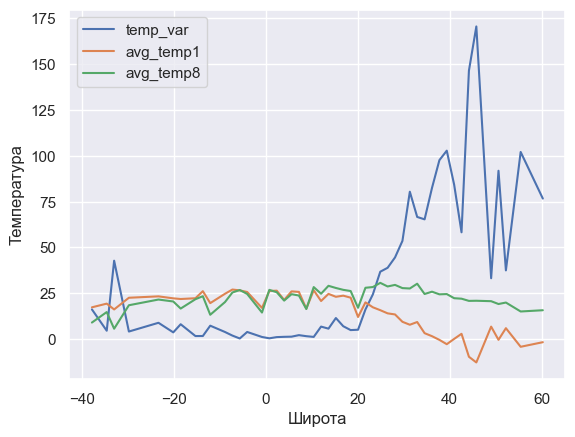

In [38]:
import seaborn as sns
sns.set_theme()
res.plot(xlabel="Широта", ylabel="Температура")

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [39]:
spb_weather = new_df[['City',  'Year', 'AverageTemperature']][new_df['City'] == 'Saint Petersburg'] \
    .groupby(['City', 'Year'], as_index=False).mean()
spb_weather.head()

,City,Year,AverageTemperature
0,Saint Petersburg,1950,4.424083
1,Saint Petersburg,1951,4.308250
2,Saint Petersburg,1952,3.749333
3,Saint Petersburg,1953,4.840083
4,Saint Petersburg,1954,4.454000


In [40]:
res_spb = spb_weather[(spb_weather['AverageTemperature'] - spb_weather['AverageTemperature'].shift(1) > 0) & (spb_weather['AverageTemperature'] - spb_weather['AverageTemperature'].shift(-1) > 0)]
res_spb.head()

,City,Year,AverageTemperature
3,Saint Petersburg,1953,4.840083
7,Saint Petersburg,1957,4.856250
9,Saint Petersburg,1959,5.026000
11,Saint Petersburg,1961,5.842083
14,Saint Petersburg,1964,4.414167


In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = spb_weather['Year'].values.reshape(-1, 1)
y = spb_weather['AverageTemperature'].values.reshape(-1, 1)
regressor = LinearRegression().fit(X, y)
y_pred = regressor.predict(X)

Text(0.5, 1.0, 'Среднегодовая температура в Санкт-Петербурге')

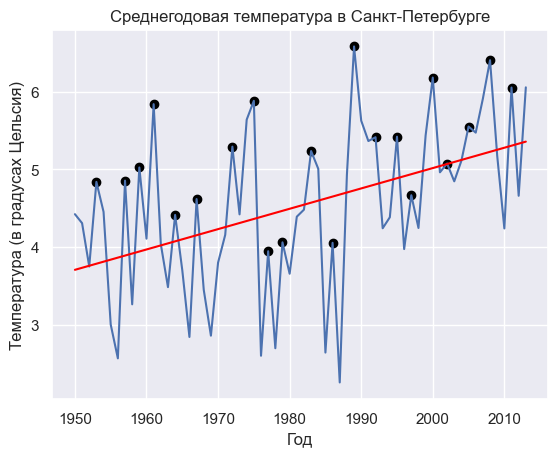

In [42]:
plt.scatter(res_spb['Year'], res_spb['AverageTemperature'], c='black')
plt.plot(X, y)
plt.xlabel('Год')
plt.plot(X, y_pred, color='red')
plt.ylabel('Температура (в градусах Цельсия)')
plt.title('Среднегодовая температура в Санкт-Петербурге')

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [43]:
new_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,new_latitude,new_longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,1,5.63,-3.23
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,2,5.63,-3.23
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,3,5.63,-3.23
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,4,5.63,-3.23
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,5,5.63,-3.23


In [44]:
#1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
task_1 = new_df[['City', 'Year', 'AverageTemperature']].groupby(['City', 'Year'], as_index=False).mean()
task_1.head()

,City,Year,AverageTemperature
0,Abidjan,1950,26.195417
1,Abidjan,1951,26.324750
2,Abidjan,1952,26.279500
3,Abidjan,1953,26.244417
4,Abidjan,1954,26.011083


In [45]:
max_city_temp = task_1[['City', 'AverageTemperature']].groupby(['City']).max()
min_city_temp = task_1[['City', 'AverageTemperature']].groupby(['City']).min()
dif_city_temp = (max_city_temp - min_city_temp)
res1 = dif_city_temp['AverageTemperature']
print(res1.idxmax(), max(res1))

Mashhad 5.250000000000002


In [46]:
#2. Самая большая средняя разница между средней температурой января и средней температурой июля.
task_2 = new_df[['City', 'Month', 'Year', 'AverageTemperature']][(new_df['Month'] == 1) | (new_df['Month'] == 7)]
task_2.head()

,City,Month,Year,AverageTemperature
1212,Abidjan,1,1950,26.773
1218,Abidjan,7,1950,24.878
1224,Abidjan,1,1951,26.944
1230,Abidjan,7,1951,24.783
1236,Abidjan,1,1952,27.009


In [47]:
res2 = task_2.groupby(['City', 'Year'], as_index=False)['AverageTemperature'].diff().abs()

In [48]:
print(task_2['City'][res2.idxmax()], res2.max())

Harbin 48.083


In [49]:
#3. Наибольшее среднее количество месяцев с отрицательной температурой в году
task_3 = new_df[['City', 'Year', 'AverageTemperature']][new_df['AverageTemperature'] < 0]
task_3.head()

,City,Year,AverageTemperature
14233,Ankara,1950,-6.195
14234,Ankara,1950,-2.796
14256,Ankara,1951,-1.995
14271,Ankara,1953,-0.443
14280,Ankara,1953,-4.343


In [52]:
n_month_df = task_3.groupby(['City', 'Year'], as_index=False).count() \
                   .rename(columns={'AverageTemperature': 'cold_months'})
n_month_df.head()

,City,Year,cold_months
0,Ankara,1950,2
1,Ankara,1951,1
2,Ankara,1953,2
3,Ankara,1954,2
4,Ankara,1956,1


In [53]:
res3 = n_month_df.groupby(['City'], as_index=False).mean()[['City', 'cold_months']]
res3.head()

,City,cold_months
0,Ankara,1.581395
1,Berlin,1.441860
2,Changchun,4.843750
3,Chengdu,1.000000
4,Chicago,1.693878


In [54]:
res3.max()

City              Xian
cold_months    4.90625
dtype: object

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [55]:
# Import Libraries
import re
import folium
import geopandas
import geodatasets
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
jan_df = new_df[(new_df['Year'] > 2003) & (new_df['Month'] == 1)].groupby(['City', 'Country', 'Latitude', 'Longitude'], as_index=False).mean() \
         [['City', 'Country', 'Latitude', 'Longitude', 'AverageTemperature']]
jan_df.head()

,City,Country,Latitude,Longitude,AverageTemperature
0,Abidjan,Côte D'Ivoire,5.63N,3.23W,27.2830
1,Addis Abeba,Ethiopia,8.84N,38.11E,18.2239
2,Ahmadabad,India,23.31N,72.52E,19.9577
3,Aleppo,Syria,36.17N,37.79E,5.9257
4,Alexandria,Egypt,31.35N,30.16E,14.8218


In [64]:
new_latitude = [float(re.sub(r"\d{1,}\.\d{1,}S", "-" + item[:-1], item).replace("N", "")) for item in jan_df['Latitude']]
new_longitude = [float(re.sub(r"\d{1,}\.\d{1,}W", "-" + item[:-1], item).replace("E", "")) for item in jan_df['Longitude']]
jan_df['new_latitude'] = new_latitude
jan_df['new_longitude'] = new_longitude
jan_df.head()

,City,Country,Latitude,Longitude,AverageTemperature,new_latitude,new_longitude
0,Abidjan,Côte D'Ivoire,5.63N,3.23W,27.2830,5.63,-3.23
1,Addis Abeba,Ethiopia,8.84N,38.11E,18.2239,8.84,38.11
2,Ahmadabad,India,23.31N,72.52E,19.9577,23.31,72.52
3,Aleppo,Syria,36.17N,37.79E,5.9257,36.17,37.79
4,Alexandria,Egypt,31.35N,30.16E,14.8218,31.35,30.16


In [65]:
geometry = geopandas.points_from_xy(jan_df.new_longitude, jan_df.new_latitude)
geo_df = geopandas.GeoDataFrame(
    jan_df, geometry=geometry
)
geo_df.head()

,City,Country,Latitude,Longitude,AverageTemperature,new_latitude,new_longitude,geometry
0,Abidjan,Côte D'Ivoire,5.63N,3.23W,27.2830,5.63,-3.23,POINT (-3.23000 5.63000)
1,Addis Abeba,Ethiopia,8.84N,38.11E,18.2239,8.84,38.11,POINT (38.11000 8.84000)
2,Ahmadabad,India,23.31N,72.52E,19.9577,23.31,72.52,POINT (72.52000 23.31000)
3,Aleppo,Syria,36.17N,37.79E,5.9257,36.17,37.79,POINT (37.79000 36.17000)
4,Alexandria,Egypt,31.35N,30.16E,14.8218,31.35,30.16,POINT (30.16000 31.35000)


Text(0.5, 1.0, 'City Temperatures')

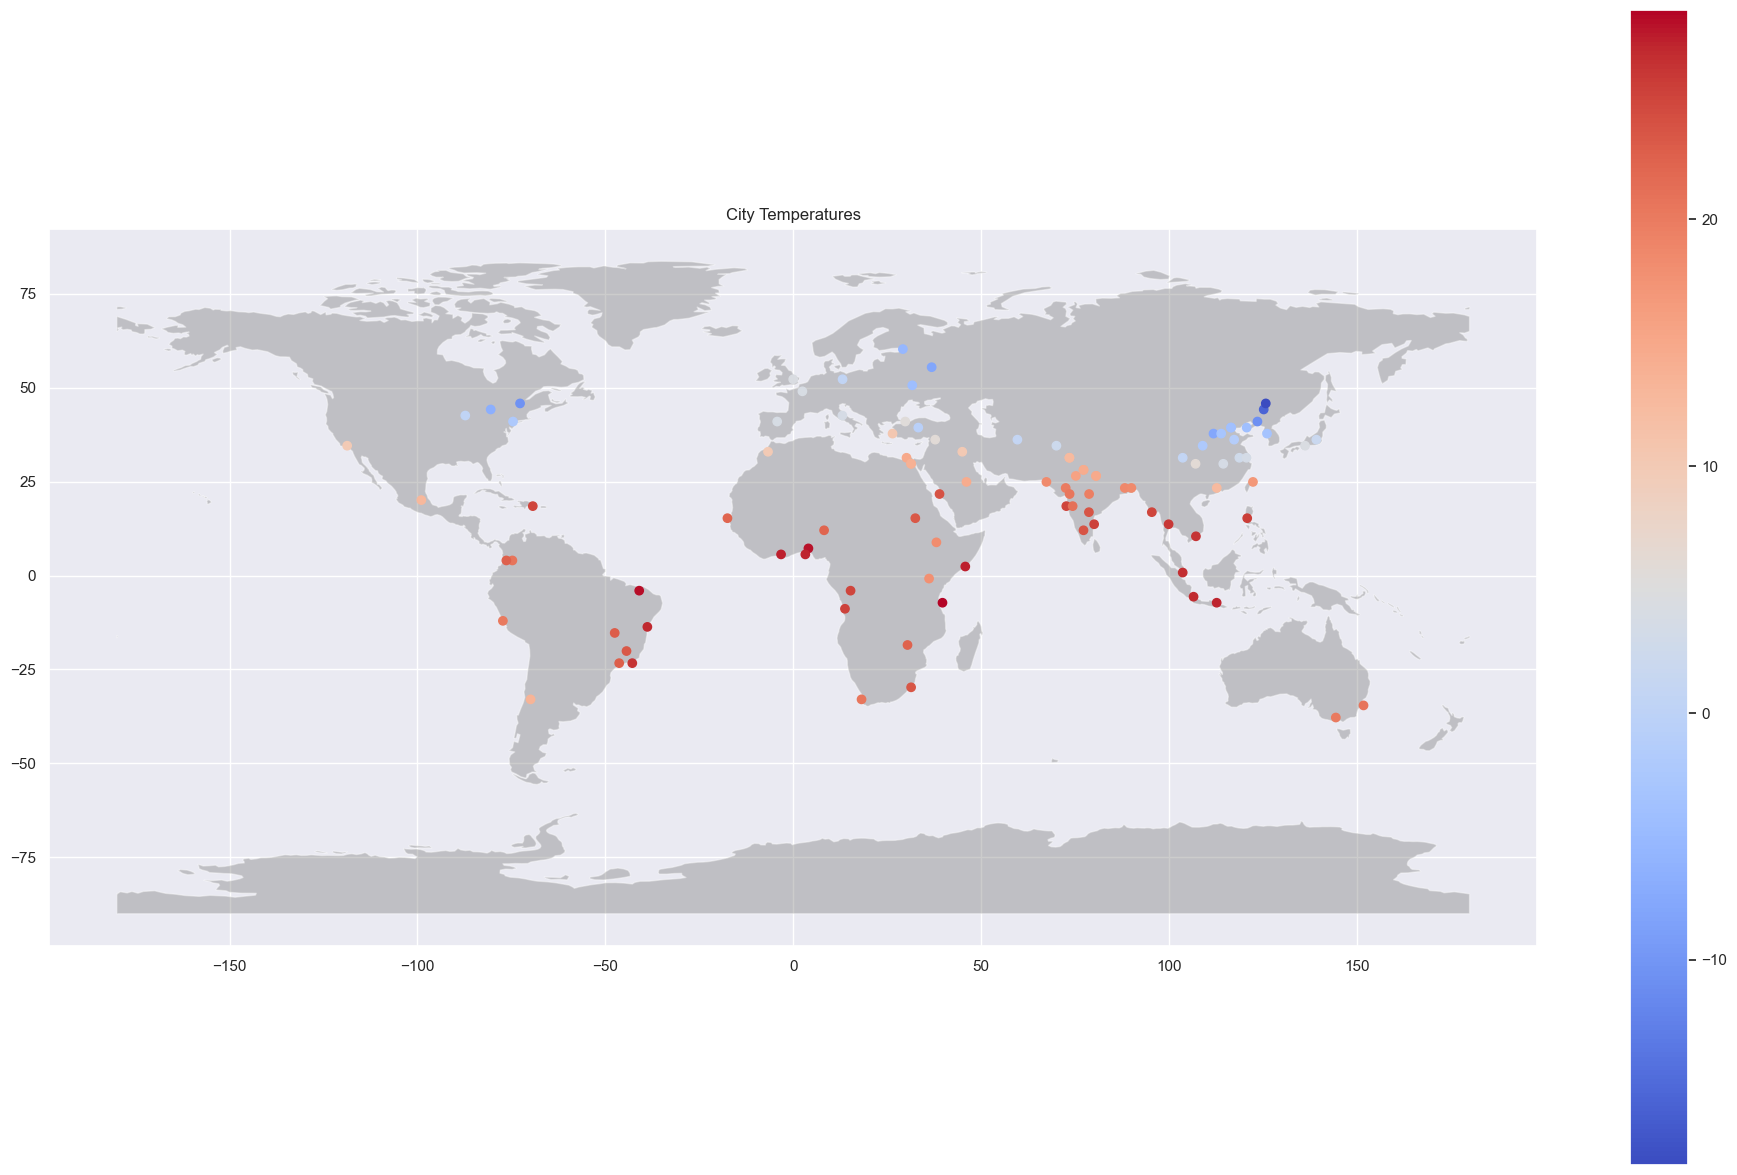

In [66]:
world = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
fig, ax = plt.subplots(figsize=(24, 15))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column=geo_df['AverageTemperature'], ax=ax, legend=True, c=geo_df['AverageTemperature'], cmap="coolwarm")
plt.title("City Temperatures")